In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [9]:
data_df = pd.read_csv ('../../Project_one/us-accidents/US_Accidents_Dec19.csv')
data_df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [11]:
data_df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [12]:
Weather_data= data_df[['ID', 'Severity', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)','Humidity(%)','Pressure(in)','Wind_Direction','Wind_Speed(mph)','Precipitation(in)','Weather_Condition']]
Weather_data.head()

,ID,Severity,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,A-1,3,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,Calm,NaN,0.02,Light Rain
1,A-2,2,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,Calm,NaN,0.00,Light Rain
2,A-3,2,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,SW,3.5,NaN,Overcast
3,A-4,3,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,SW,4.6,NaN,Mostly Cloudy
4,A-5,2,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,SW,3.5,NaN,Mostly Cloudy


In [13]:
replacements = {'Severity': 0.0}

In [14]:
Severity_data=Weather_data[['ID','Severity', 'Weather_Condition']]
Severity_data.head()

,ID,Severity,Weather_Condition
0,A-1,3,Light Rain
1,A-2,2,Light Rain
2,A-3,2,Overcast
3,A-4,3,Mostly Cloudy
4,A-5,2,Mostly Cloudy


In [15]:
Severity_data.dropna()
Severity_data.head()

,ID,Severity,Weather_Condition
0,A-1,3,Light Rain
1,A-2,2,Light Rain
2,A-3,2,Overcast
3,A-4,3,Mostly Cloudy
4,A-5,2,Mostly Cloudy


In [16]:
# The Weather_Condition will affect the number of the accident or severity. 1 is low effect on traffic. 4 is high effect on traffic.
Weather_condition = pd.DataFrame(Severity_data.groupby(["Weather_Condition"]).count()).reset_index()
Weather_group = Weather_condition[["Weather_Condition", "ID"]]
Weather_group = Weather_group.set_index("Weather_Condition")
Weather_group


,ID
Weather_Condition,
Blowing Dust,44
Blowing Dust / Windy,64
Blowing Sand,1
Blowing Snow,268
Blowing Snow / Windy,10
...,...
Volcanic Ash,22
Widespread Dust,129
Widespread Dust / Windy,1


Text(0, 0.5, 'Number of Accidents')

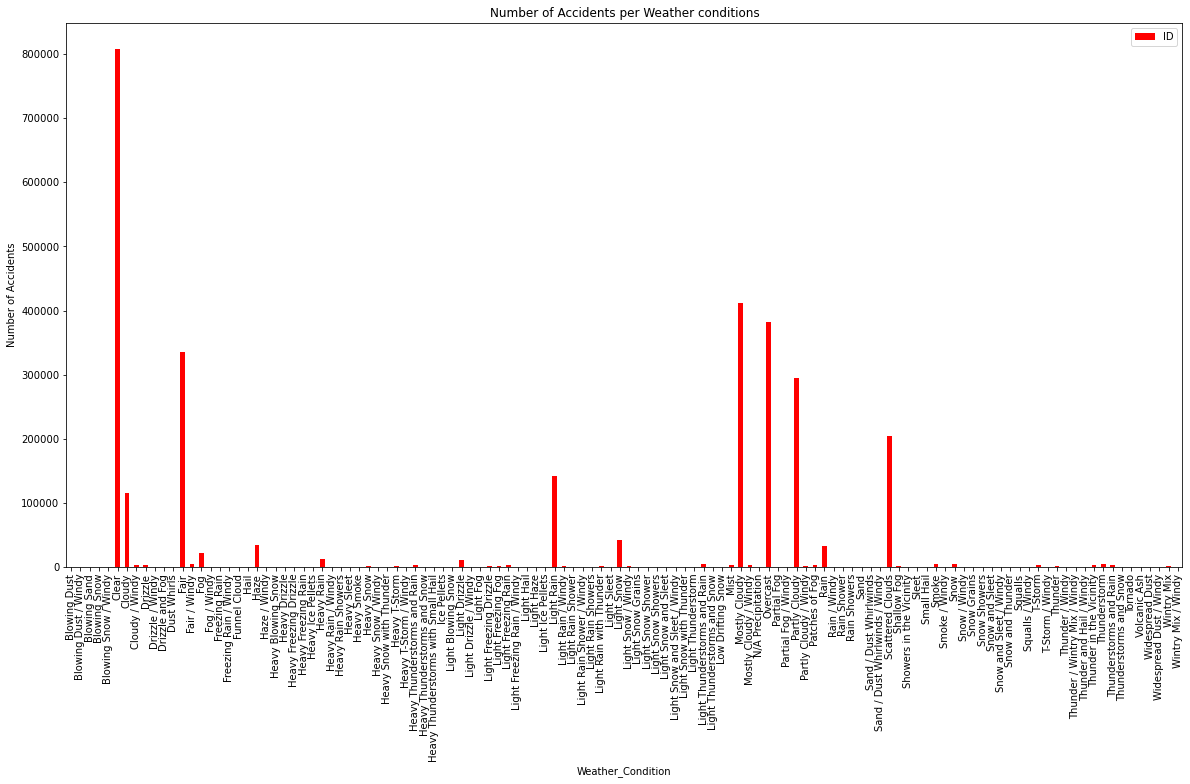

In [17]:
Weather_group.plot(kind="bar", color="r", title="Number of Accidents per Weather conditions", figsize=(20, 10))
plt.ylabel("Number of Accidents")

In [18]:
Windspeed_data= data_df[['ID', 'Wind_Speed(mph)']]
Windspeed_data

,ID,Wind_Speed(mph)
0,A-1,NaN
1,A-2,NaN
2,A-3,3.5
3,A-4,4.6
4,A-5,3.5
...,...,...
2974330,A-2974354,13.0
2974331,A-2974355,6.0
2974332,A-2974356,10.0
2974333,A-2974357,8.0


In [19]:
Windspeed_data.dropna()

,ID,Wind_Speed(mph)
2,A-3,3.5
3,A-4,4.6
4,A-5,3.5
5,A-6,3.5
6,A-7,3.5
...,...,...
2974330,A-2974354,13.0
2974331,A-2974355,6.0
2974332,A-2974356,10.0
2974333,A-2974357,8.0


In [21]:
Wind_speed = pd.DataFrame(Windspeed_data.groupby(["Wind_Speed(mph)"]).count()).reset_index()
Wind_group = Wind_speed[["Wind_Speed(mph)", "ID"]]
Wind_group

,Wind_Speed(mph),ID
0,0.0,136928
1,1.0,63
2,1.2,445
3,2.0,137
4,2.3,905
...,...,...
142,328.0,1
143,471.8,1
144,580.0,2
145,703.1,2


(0.0, 40.0)

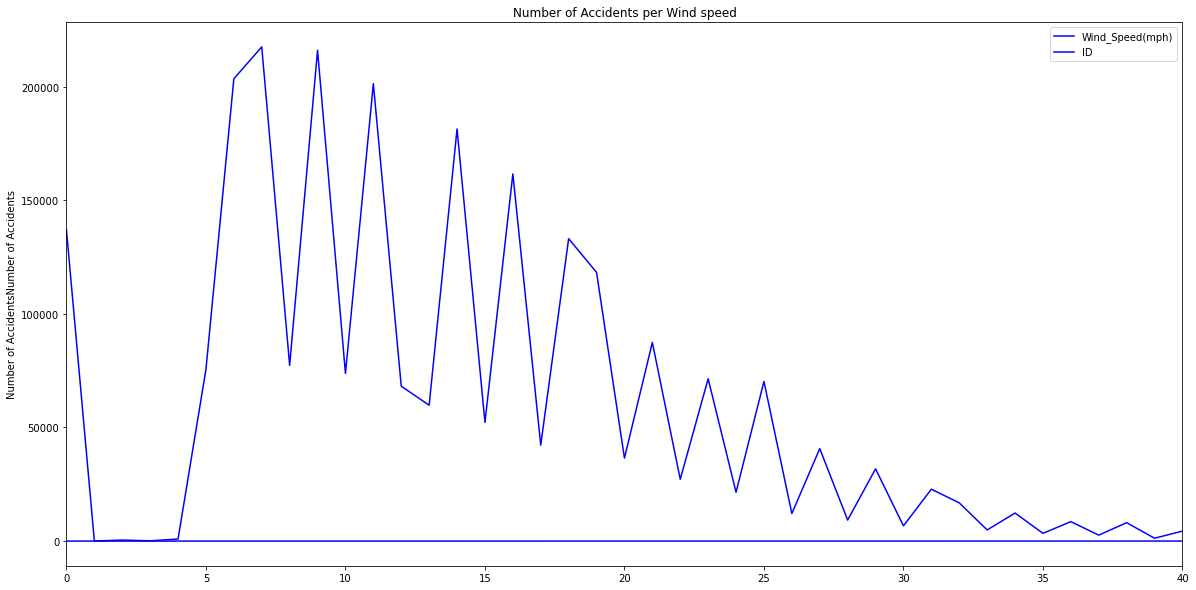

In [22]:
Wind_group.plot(kind="line", color="b", title="Number of Accidents per Wind speed", figsize=(20, 10))
plt.ylabel("Number of AccidentsNumber of Accidents")
plt.xlim(0,40)

In [23]:
# Convert the "Wind_Speed(mph)" column to numeric so the data can be used
Wind_group['Wind_Speed(mph)'] = pd.to_numeric(Wind_group['Wind_Speed(mph)'])

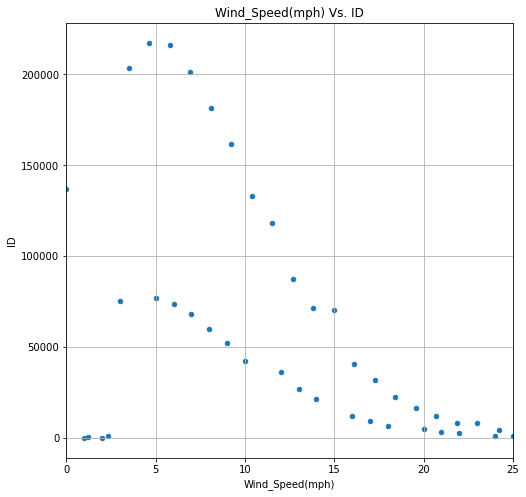

In [24]:
# Create a scatter plot which compares ID to Wind_Speed(mph)
Wind_group.plot(kind="scatter", x="Wind_Speed(mph)", y="ID", grid=True, figsize=(8,8),
              title="Wind_Speed(mph) Vs. ID")
plt.xlim(0,25)
plt.show()


The r-squared is: -0.2433593815002011


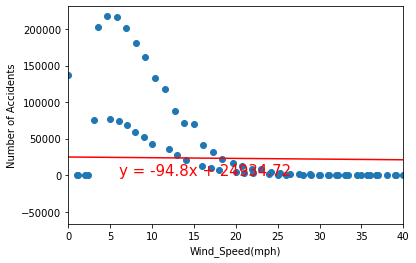

In [26]:
# Print out the r-squared value along with the plot.
x_values = Wind_group["Wind_Speed(mph)"]
y_values = Wind_group["ID"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind_Speed(mph)')
plt.ylabel('Number of Accidents')
print(f"The r-squared is: {rvalue}")
plt.xlim(0,40)
plt.show()

In [34]:
Humidity_data= data_df[['ID', 'Humidity(%)']]
Humidity_data.dropna()
Humidity_data

,ID,Humidity(%)
0,A-1,91.0
1,A-2,100.0
2,A-3,100.0
3,A-4,96.0
4,A-5,89.0
...,...,...
2974330,A-2974354,40.0
2974331,A-2974355,73.0
2974332,A-2974356,64.0
2974333,A-2974357,81.0


In [35]:
Humidity_data = pd.DataFrame(Humidity_data.groupby(['Humidity(%)']).count()).reset_index()
Humidity_group = Humidity_data[["Humidity(%)", "ID"]]
Humidity_group

,Humidity(%),ID
0,1.0,13
1,2.0,74
2,3.0,251
3,4.0,1076
4,5.0,1673
...,...,...
95,96.0,56437
96,97.0,37035
97,98.0,2312
98,99.0,3900


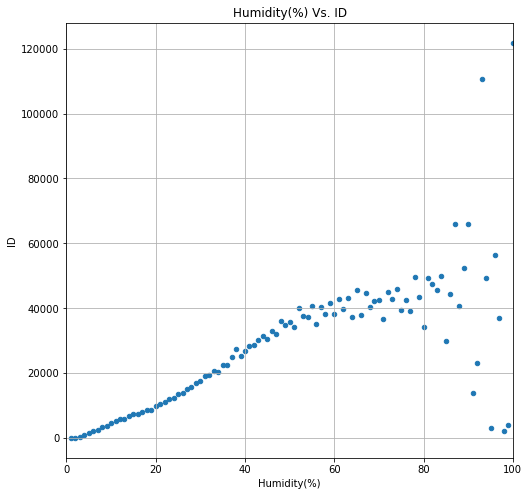

In [36]:
# Create a scatter plot which compares ID to Humidity(%)
Humidity_group.plot(kind="scatter", x="Humidity(%)", y="ID", grid=True, figsize=(8,8),
              title="Humidity(%) Vs. ID")
plt.xlim(0,100)
plt.show()

The r-squared is: 0.7228466788412266


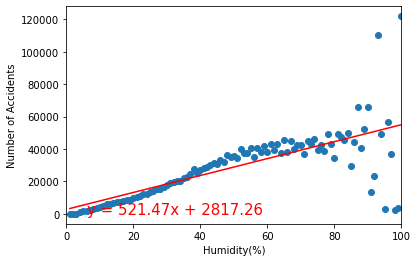

In [38]:
# Print out the r-squared value along with the plot.
x_values = Humidity_group["Humidity(%)"]
y_values = Humidity_group["ID"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity(%)')
plt.ylabel('Number of Accidents')
print(f"The r-squared is: {rvalue}")
plt.xlim(0,100)
plt.show()